In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D
from keras.layers.core import Flatten
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

In [4]:
# Load CIFAR-100 dataset
(xtr, ytr), (xt, yt) = cifar100.load_data()

print('x_tain shape:', xtr.shape)
print(xtr.shape[0], 'train samples')
print(xt.shape[0], 'test samples')

x_tain shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 
               'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 
               'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
               'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo',
               'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 
               'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 
               'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 
               'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
               'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 
               'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [ ]:
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(ytr[:]==i)[0]
    features_idx = xtr[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [8]:
# Convert class vectors to binary class matrices.
ytr = tf.keras.utils.to_categorical(ytr, 100)
yt = tf.keras.utils.to_categorical(yt, 100)

In [22]:
# Building the CNN Model (Hidden Output)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',input_shape=xtr.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))

In [23]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_25 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_26 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 activation_26 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 batch_normalization_25 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                     

In [25]:
# compile (Hidden Output)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

xtr = xtr.astype('float32')
xt = xt.astype('float32')

# Normalizing the input image
xtr /= 255
xt /= 255

epochs=50

# Training the model
history = model.fit(xtr, ytr,
              batch_size=32,
              epochs=epochs,
              validation_data=(xt, yt),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 28s 12ms/step - loss: 11.1236 - accuracy: 0.0769 - val_loss: 8.8356 - val_accuracy: 0.1192
Epoch 2/50
1563/1563 [==============================] - 19s 12ms/step - loss: 7.3806 - accuracy: 0.1593 - val_loss: 6.0975 - val_accuracy: 0.2106
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 5.4167 - accuracy: 0.2114 - val_loss: 4.7138 - val_accuracy: 0.2478
Epoch 4/50
1563/1563 [==============================] - 18s 11ms/step - loss: 4.2938 - accuracy: 0.2607 - val_loss: 5.0819 - val_accuracy: 0.1561
Epoch 5/50
1563/1563 [==============================] - 18s 11ms/step - loss: 3.6260 - accuracy: 0.3088 - val_loss: 4.5019 - val_accuracy: 0.1938
Epoch 6/50
1563/1563 [==============================] - 18s 12ms/step - loss: 3.2325 - accuracy: 0.3443 - val_loss: 7.4875 - val_accuracy: 0.0473
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 2.9809 - accuracy: 0.3802 - val_loss: 4.1915 

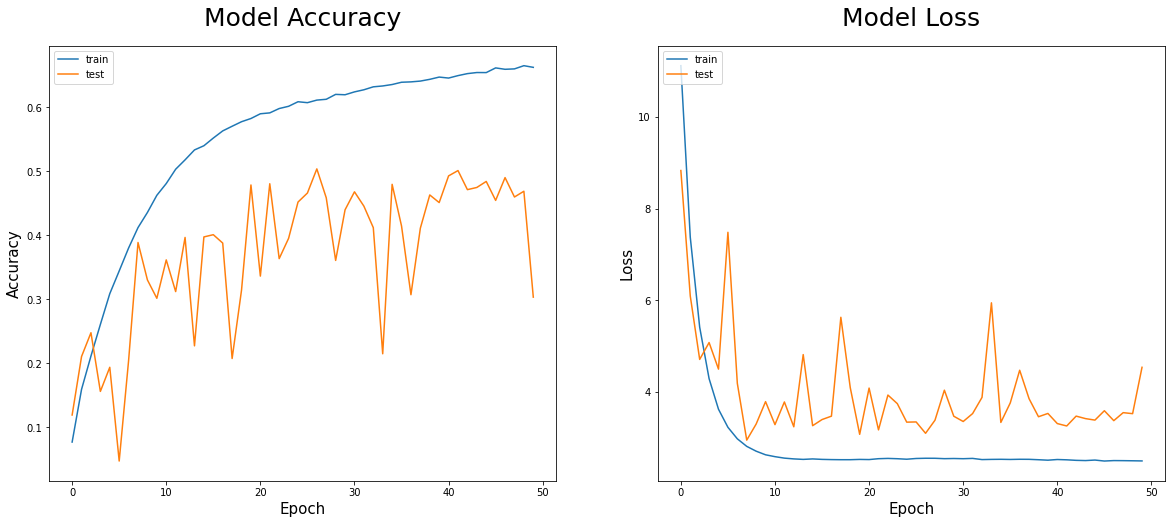

In [26]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
y_pred = model.predict(xt)
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

313/313 [==============================] - 1s 3ms/step


[68, 33, 93, 51, 71]

In [42]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])

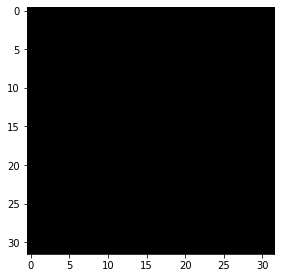

In [50]:
plt.figure(figsize=[10,10])

plt.subplot(2,2,1)
plt.imshow(xt[4].reshape(32, 32, -1))
plt.grid(False)

TypeError: ignored

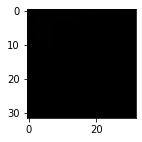

In [45]:
plot_sample(xtr, ytr, 0)

313/313 [==============================] - 1s 3ms/step


IndexError: ignored

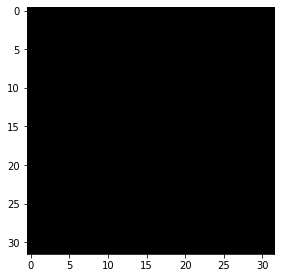

In [30]:
# Checking the predictions! (Hidden Input)
predictions = model.predict(xt)

plt.figure(figsize=[10,10])


plt.subplot(2,2,1)
n = 3
plt.imshow(xt[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,2)
n = 4
plt.imshow(xt[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,3)
n = 8
plt.imshow(xt[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,4)
n = 6
plt.imshow(xt[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="#6166B3")

plt.show()

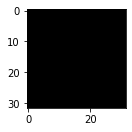

In [33]:
plt.subplot(2,2,1)
n = 6
plt.imshow(xt[n].reshape(32, 32, -1))